# Initialize

## Load Libraries

In [1]:
import numpy as np
import random
import scipy.special
import matplotlib.pyplot as plt
#%matplotlib inline

## Define functions

In [2]:
def binomial(n, k, p):
    return scipy.special.binom(n,k)*p**k*(1-p)**(n-k)

# Main

## Simulation des Experiments
$N$ Nanopartikel, die gleichzeitig gemessen werden. Die Wahrscheinlichkeit, dass ein Nanopartikel im "an" Zustand ist, ist $p$. Wir messen die emittierte Lichtintensität $I$. Ein Nanopartikel im Zustand "an" emittiert die Intensität $I_0$.
Die Nanopartikel schalten zufällig zwischen den beiden Zuständen "an" und "aus" hin und her, wir messen die Intensität als Funktion der Zeit und erhalten so eine zeitlich fluktuierende Helligkeit.

In [3]:
# Anzahl der Nanopartikel, zufällig und unbekannt
N_mean = 10
N_std = 5
N = int(np.random.normal(N_mean, N_std))

# Wahrscheinlichkeit dafür, dass das Nanopartikel "an" ist, ebenfalls zufällig und unbekannt
p = random.random()

# Alle möglichen Konfigurationen
k = np.linspace(0, N-1, N)

# Und die dazugehörigen Wahrscheinlichkeiten
P = np.zeros(N) 

# Die Messung

### Zeitachse

In [4]:
# Anzahl der Zeitschritte, dies ist hier gleichbedeutend mit der Anzahl der unterschiedlichen Konfigurationen der Emitter
n_t = 1001 # s

t = np.linspace(0, n_t - 1, n_t)

### Intensitäten

In [5]:
# Die Intensität pro Emitter, die wir zur Not unabhängig bestimmen können
I_0 = 1

# Der Ergebnisvektor der gemessenen Intensitäten
I = np.zeros(n_t)

for i, ti in enumerate(t):
    # In jedem Zeitschritt werden N gleichverteilte Zufallszahlen erzeugt. 
    # Ist die Zufallszahl kleiner als p ist der Emitter an
    # und trägt ein I_0 zur Gesamt-Intensität in diesem Zeitschritt bei.
    I[i] = np.sum(np.random.random(N) < p) * I_0 

### Plotte Ergebnis

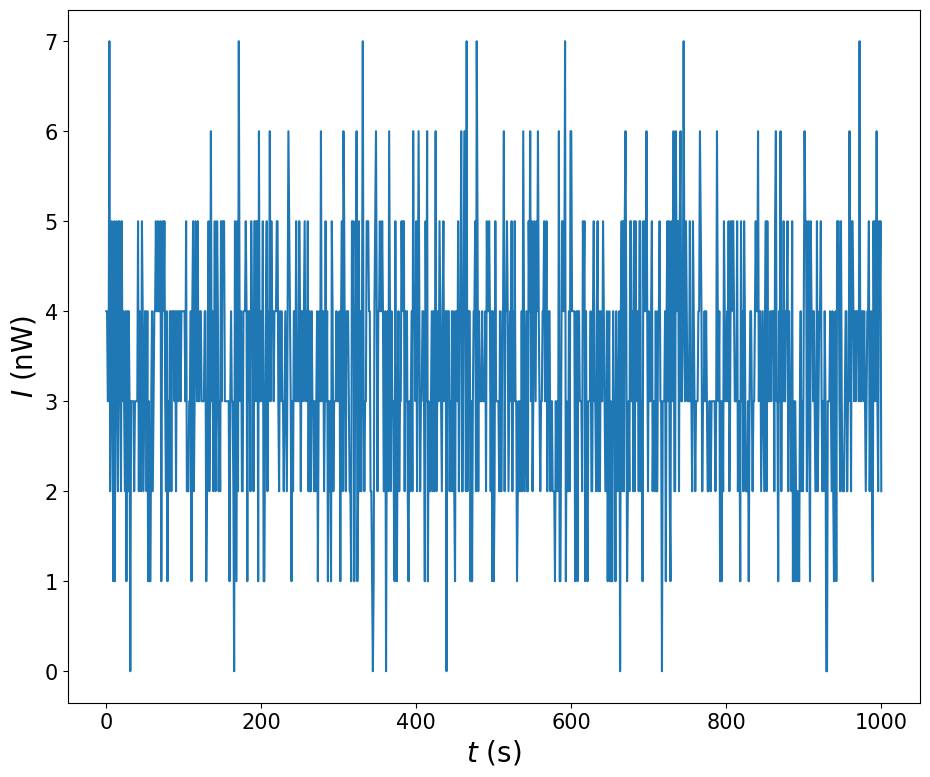

In [6]:

plt.figure(
    num=1,
    figsize=(11, 9),
    facecolor='white')
plt.xlabel(r'$t$ (s)', fontsize=20)
plt.ylabel(r'$I$ (nW)', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(t, I)

plt.show()

# Histogram der Intensitätsverteilung

In [7]:
# Histogramm und Bins
hist = np.zeros(int(np.max(I) + 1))
bins = range(0, int(np.max(I) + 1))

# Erzeugen des normierten Histograms (PMF)
for i, Ii in enumerate(I):
    # Da I_0 = 1 können wir einfach I_i (für jeden Zeitschritt) als 
    # Index für den Histogrammeintrag benutzen den wir um 1/n_t erhören.
    # So erhalten wir das normierte Histogramm, also die PMF.
    hist[int(Ii)] = hist[int(Ii)] + 1 / n_t

### Plotte Histogram

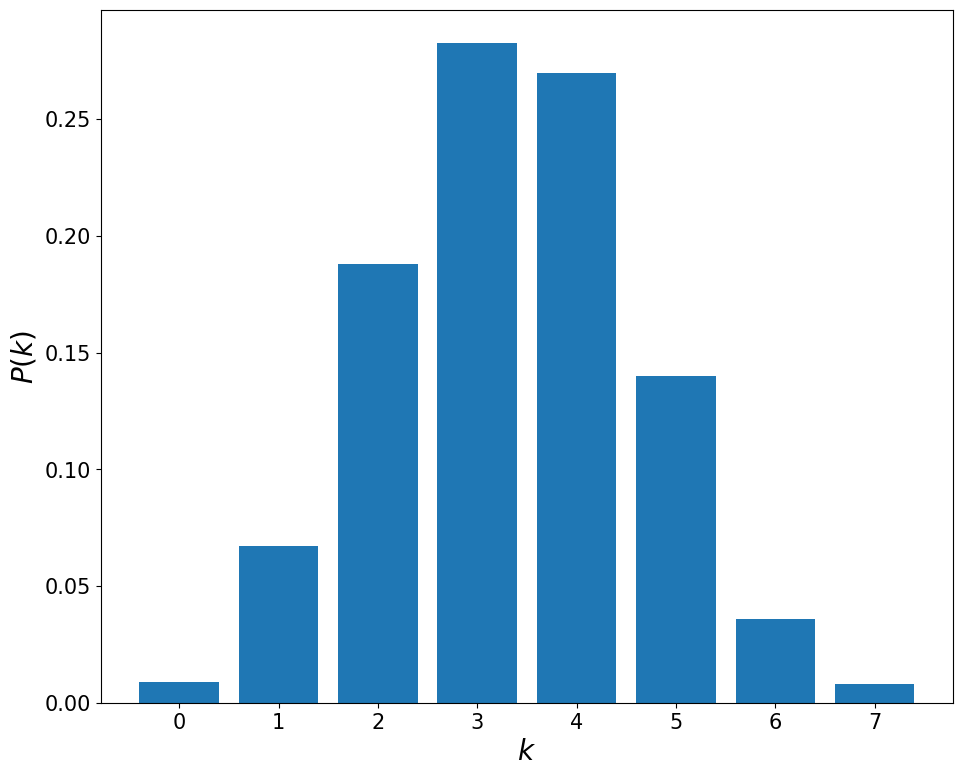

In [8]:
plt.figure(
    num=1,
    figsize=(11, 9),
    facecolor='white')
plt.xlabel('$k$', fontsize=20)
plt.ylabel('$P(k)$', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar(bins, hist)
plt.show()

## Berechnen von Mittelwert und Varianz bzw Standardabweichung

In [9]:
mean = np.mean(I)
var = np.var(I)

print('Mean = {:0.2f}'.format(mean))
print('Std = {:0.2f}'.format(np.sqrt(var)))

Mean = 3.34
Std = 1.30


Wir nehemn am dass die Intensitätsverteilung binomialverteilt ist. Also gilt:
\begin{equation}
\mathrm{mean} = N p \\
\mathrm{std}^2 = N p (1-p)
\end{equation}


Somit können wir berechnen:

\begin{equation}
p = 1 - \frac{\mathrm{std}^2}{\mathrm{mean}}\\
N = \frac{\mathrm{mean}}{p}
\end{equation}

In [10]:
p_est = 1 - var/mean

N_est = int(np.round(mean/p_est))

print('Gemessene Werte:')
print('================')
print('p = {:0.2f}'.format(p_est))
print('N = {:d}\n'.format(N_est))

print('Wahre Werte:')
print('============')
print('p = {:0.2f}'.format(p))
print('N = {:d}'.format(N))

Gemessene Werte:
p = 0.49
N = 7

Wahre Werte:
p = 0.48
N = 7


### Berechne die zugehörige Verteilungsfunktion

In [11]:
# Berechne Wahrscheinlichkeiten

# Alle möglichen Zustände
k = np.linspace(0, N_est, N_est+1)
# Wahrscheinlichkeiten
P = np.zeros(N_est+1)

# Berechne Binomialverteilung
for i, ki in enumerate(k):
    P[i] = binomial(N_est, ki, p_est)

### Plotte Messergebnis und die zugehörige Verteilungsfunktion

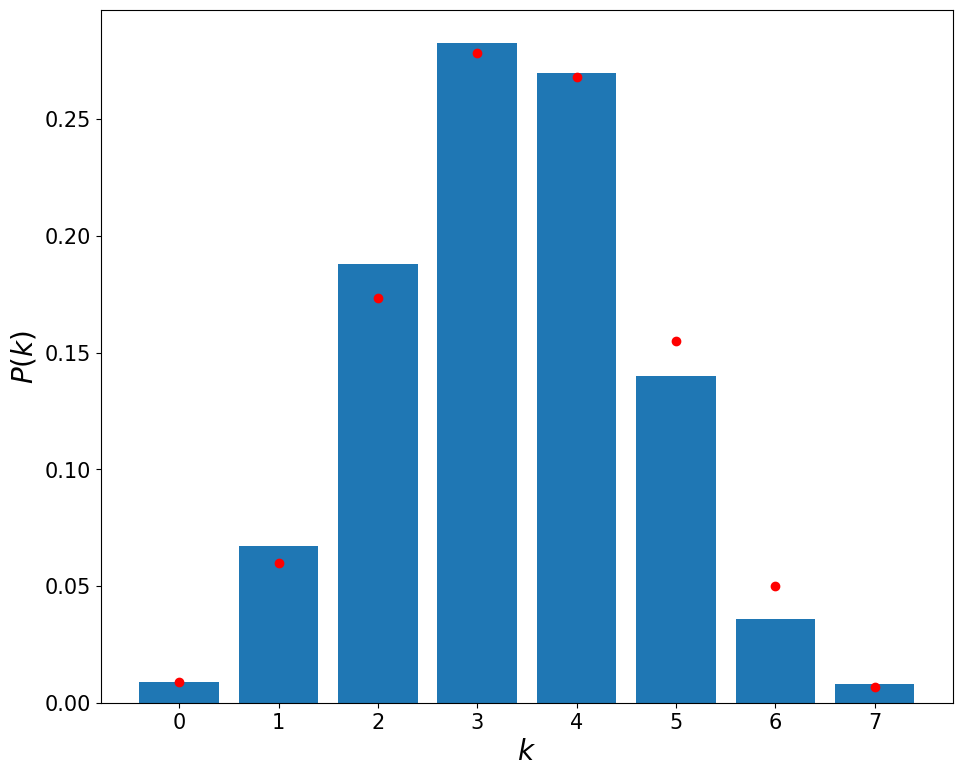

In [12]:

plt.figure(
    num=1,
    figsize=(11, 9),
    facecolor='white')
plt.xlabel('$k$', fontsize=20)
plt.ylabel('$P(k)$', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar(bins, hist)
plt.plot(k, P, 'ro')
plt.show()